Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

Part 1: Simple Examples

1.1 Concatenate

Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, df1 and df2.

In [2]:
#create df1
df1 = pd.DataFrame({"a": [1, 2, 3, 4], "b": [4, 5, 6, 7], "c": [7, 8, 9, 10]})
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [3]:
#create df2
df2 = pd.DataFrame({"a": [6, 7, 2, 12], "b": [3, 5, 12, 6], "c": [10, 4, 2, 7]})
df2.head()

,a,b,c
0,6,3,10
1,7,5,4
2,2,12,2
3,12,6,7


**Concatinate by Rows**

**concatinating by rows is the default behavior of pd.concat() This is often the most common form of concatination**

In [4]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. 
#Note that 'axis=0' is the default and doesn't have to be specified.
concatinated_by_row = pd.concat([df1, df2], axis=0)
concatinated_by_row = concatinated_by_row.reset_index()
concatinated_by_row

,index,a,b,c
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9
3,3,4,7,10
4,0,6,3,10
5,1,7,5,4
6,2,2,12,2
7,3,12,6,7


**Concatinate by columns**

In [5]:
concatinated_by_column= pd.concat([df1, df2], axis=1)


concatinated_by_column


,a,b,c,a,b,c
0,1,4,7,6,3,10
1,2,5,8,7,5,4
2,3,6,9,2,12,2
3,4,7,10,12,6,7


In [6]:
#rename the column
concatinated_by_column.columns = ["a", "b", "c", "d", "e", "f"]
concatinated_by_column

,a,b,c,d,e,f
0,1,4,7,6,3,10
1,2,5,8,7,5,4
2,3,6,9,2,12,2
3,4,7,10,12,6,7


**1.2 Merge**

Merging joins two datasets together based on a common key

In [7]:
#stocknames
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
                          'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname


,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [8]:
#stockprice
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 
                          'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [9]:
# Merge these dataframes.
named_stocks = pd.merge(openprice, stockname, on="Symbol")
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [10]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
                       '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [11]:
# Now merge that with the named stocks.
full_stocks = pd.merge(named_stocks, wkhigh, on="Symbol")
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49


In [12]:
  #The other paraameter is "how", by default how inner
  full_stocks = pd.merge(named_stocks, wkhigh, on="Symbol", how="inner")
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49


In [13]:
full_stocks = pd.merge(named_stocks, wkhigh, on="Symbol", how="left")
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49


In [14]:
full_stocks = pd.merge(named_stocks, wkhigh, on="Symbol", how="outer")
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


In [15]:
full_stocks = pd.merge(named_stocks, wkhigh, on="Symbol", how="right")
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49
4,NFLX,NaN,NaN,303.22


In [16]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

1.3 Reshape: melt and pivot_table

Why reshape data?

Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).
Seaborn will be most powerful when your datasets have a particular organization.
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

Each variable is a column

Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring video clip from Apollo 13: “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!


Hadley Wickham: 'wide' format vs. 'tidy' format

In [25]:
# Let's create a simple table.

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])


,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.

The table has two columns and three rows, and both rows and columns are labelled."

In [27]:
#this is the example for wide format
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [28]:
#create a column header
table1 = table1.reset_index()
table1



,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [41]:
#what is the unique identifier for each row
#where is the data that i want to be in my single tidy column
#MELT function helps to go from wide to tidy
tidy1 = table1.melt(id_vars="index", value_vars=["treatmenta", "treatmentb"])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [43]:
#rename column
tidy1 = tidy1.rename(columns={
    'index':'name',
                              
    'variable':'trt',
    'value':'result'
    
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [46]:
tidy1.trt=tidy1.trt.str.replace('treatment','')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**tidy1 to table 1**

In [48]:
#index: unique identifie
#columns: what do you want to differentiate the columns in wide format
#values: where are the numbers at - go in the middle of the wide dataframe
wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


important thing to notice

melt function goes from wide to tidy

pivot_table goes from tidy to wide

Seaborn example

The rules can be simply stated:

     Each variable is a column
     Each observation is a row
     
A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

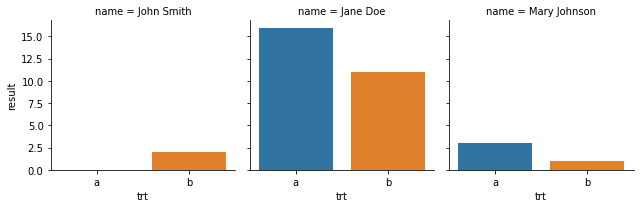

In [81]:
sns.catplot(data=tidy1, x='trt', y='result', col='name', kind='bar', height=3);

Part 2: More complex examples

2.1 Concatenating time-series datasets from Chicago

In [0]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [90]:
#lets look at the first quarter
q1_df=pd.read_csv(q1_path)
print(q1_df.shape)
q1_df.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [92]:
#second quarter
q2_df = pd.read_csv(q2_path)
print (q2_df.shape)
q2_df.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [93]:
#do they have exactly same column names?
print(q1_df.columns)
print(q2_df.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [0]:
#lets define a function to check if they are really equal

def myfunc (col1, col2):
  diff = list(set(col1)-set(col2))
  print ('difference is:', diff)






In [103]:
myfunc(q1_df.columns,q2_df.columns )

difference is: []


In [105]:
#now we are sure they are equal, lets concatinate them
q1_q2_df=pd.concat([q1_df, q2_df], axis=0 )
q1_q2_df.shape

(2000, 12)

In [106]:
#confirm that it did what wenna do
print(q1_df.shape)
print(q2_df.shape)
print(q1_q2_df.shape)

(1000, 12)
(1000, 12)
(2000, 12)


In [108]:
#now add quarters 3 and 4 as well
q3_df=pd.read_csv(q3_path)
q4_df=pd.read_csv(q4_path)
print (q3_df.shape)
print (q4_df.shape)

(1000, 12)
(1000, 12)


In [110]:
#now lets concatinate q3 and q4
q3_q4_df=pd.concat([q3_df, q4_df], axis=0)
q3_q4_df.shape

(2000, 12)

In [111]:
#now lets concatinate all 4 quarters
allquart_df=pd.concat([q1_q2_df, q3_q4_df], axis=0)
allquart_df.shape

(4000, 12)

In [112]:
allquart_df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


**Working with datetime objects¶**

In [113]:
#starttime is an "object" time
allquart_df['starttime'].dtype

dtype('O')

In [117]:
#convert it to datetime format and make it into a weekday
allquart_df['date']=pd.to_datetime(allquart_df['starttime']).dt.date
allquart_df[['starttime', 'date']].head()

,starttime,date
0,3/12/2015 7:11,2015-03-12
1,1/22/2015 17:07,2015-01-22
2,3/16/2015 10:30,2015-03-16
3,3/10/2015 17:19,2015-03-10
4,1/22/2015 17:02,2015-01-22


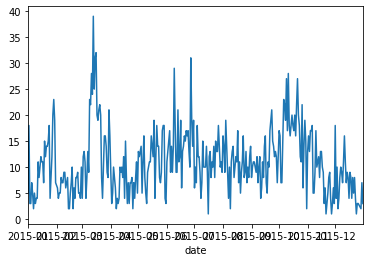

In [120]:
#display a line plot using the above data
allquart_df.groupby(['date']) ['trip_id'].count().plot();

In [122]:
#convert it into a datetime format and convert it into a month
allquart_df['month'] = pd.to_datetime(allquart_df['starttime']).dt.month
allquart_df[['starttime', 'date', 'month']].head()

,starttime,date,month
0,3/12/2015 7:11,2015-03-12,3
1,1/22/2015 17:07,2015-01-22,1
2,3/16/2015 10:30,2015-03-16,3
3,3/10/2015 17:19,2015-03-10,3
4,1/22/2015 17:02,2015-01-22,1


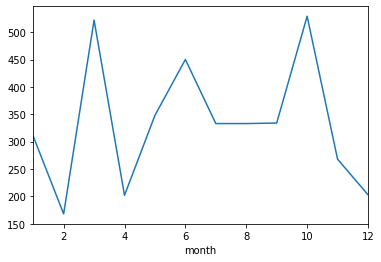

In [123]:
#display a line plot with the above information
allquart_df.groupby(['month']) ['trip_id'].count().plot();

In [129]:
 #Convert to datetime format and make it into a weekday
# The day of the week with Monday=0, Sunday=6.
allquart_df['weekday'] = pd.to_datetime(allquart_df['starttime']).dt.weekday
allquart_df['weekday'].value_counts().sort_index()

0    605
1    602
2    612
3    555
4    603
5    538
6    485
Name: weekday, dtype: int64

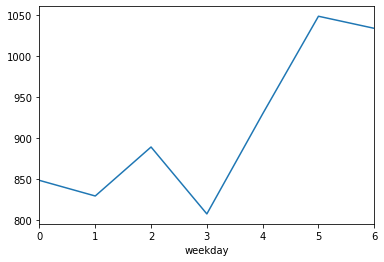

In [130]:

#display a line chart with that information
allquart_df.groupby(['weekday'])['tripduration'].mean().plot();

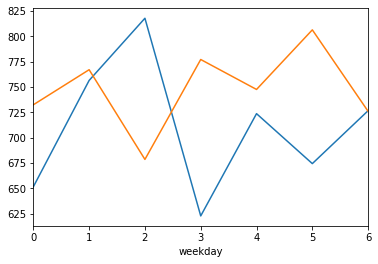

In [132]:
#do men and women have different cycling pattern
allquart_df[allquart_df['gender']=='Male'].groupby(['weekday'])['tripduration'].mean().plot();
allquart_df[allquart_df['gender']=='Female'].groupby(['weekday'])['tripduration'].mean().plot();

2.2 Merging datasets about counties

Original sources:

https://www.kaggle.com/muonneutrino/us-census-demographic-data/download

https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [0]:
#get some population data about counties from the census bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'


In [136]:
#read that into pandas and check out 5 rows
cen_df = pd.read_csv(source1)
cen_df.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1508,29051,Missouri,Cole County,76749,38820,37929,2.8,81.5,11.6,0.3,1.4,0.1,58348,54216,1664,27559,1003,12.6,17.9,37.6,16.0,25.7,8.2,12.4,85.6,9.3,0.4,1.1,0.9,2.7,18.0,36629,68.5,26.5,4.8,0.2,4.4
3056,55019,Wisconsin,Clark County,34513,17507,17006,4.4,93.5,0.4,0.2,0.4,0.0,23756,49131,1189,23437,535,13.2,18.5,27.9,14.5,17.3,15.1,25.2,73.1,8.2,0.0,4.4,2.9,11.5,21.1,15796,76.4,8.4,14.4,0.8,3.3
3087,55079,Wisconsin,Milwaukee County,956586,462784,493802,14.6,52.2,26.1,0.5,4.1,0.0,679917,46784,479,26933,227,20.5,30.2,36.0,19.8,22.9,5.9,15.4,76.5,9.2,5.7,3.6,1.6,3.4,22.4,454524,84.7,11.6,3.6,0.1,7.1
3037,54091,West Virginia,Taylor County,16977,8645,8332,0.4,96.1,1.3,0.0,1.2,0.0,13451,45916,4362,23683,1281,15.7,20.1,33.4,17.3,21.6,11.6,16.1,88.5,6.1,0.0,0.4,2.5,2.5,30.2,6905,77.9,18.1,4.0,0.0,8.9
988,20201,Kansas,Washington County,5572,2846,2726,3.3,94.3,0.3,0.1,0.1,0.0,4194,47992,2186,26927,1707,9.7,13.6,30.6,14.7,18.7,19.1,16.9,77.7,11.6,0.1,4.0,1.6,4.9,19.2,2787,72.2,17.2,10.3,0.4,2.2


In [137]:
#what are all the columns
print(cen_df.columns)

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


In [139]:
#lets restrict that to only few columns to understand about the commute time
commute=cen_df[['CountyId', 'State', 'County','MeanCommute']]
commute.head()

,CountyId,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0
2,1005,Alabama,Barbour County,23.4
3,1007,Alabama,Bibb County,30.0
4,1009,Alabama,Blount County,35.0


In [140]:
#what is the average commute
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [144]:
#take a look at the new data
usda_df = pd.read_excel(source2)
usda_df.sample(4)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
3004,54023,WV,Grant County,11937,7,"Nonmetro - Urban population of 2,500 to 19,999..."
1386,27145,MN,Stearns County,150642,3,Metro - Counties in metro areas of fewer than ...
1119,22013,LA,Bienville Parish,14353,6,"Nonmetro - Urban population of 2,500 to 19,999..."
2917,51520,VA,Bristol city,17835,2,"Metro - Counties in metro areas of 250,000 to ..."


In [146]:
#what are those rucc code all about?
usda_df.groupby(['RUCC_2013'])['Description'].max()

RUCC_2013
1    Metro - Counties in metro areas of 1 million p...
2    Metro - Counties in metro areas of 250,000 to ...
3    Metro - Counties in metro areas of fewer than ...
4    Nonmetro - Urban population of 20,000 or more,...
5    Nonmetro - Urban population of 20,000 or more,...
6    Nonmetro - Urban population of 2,500 to 19,999...
7    Nonmetro - Urban population of 2,500 to 19,999...
8    Nonmetro - Completely rural or less than 2,500...
9    Nonmetro - Completely rural or less than 2,500...
Name: Description, dtype: object

In [0]:
#lets shrink the usda data to just the column we need
usda_df1 = usda_df[['FIPS', 'RUCC_2013']]

In [148]:
#lets merge that with our census data about commute time
metro_commute = pd.merge(commute, usda_df1, left_on='CountyId', right_on="FIPS", how='left')
metro_commute.head()

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
0,1001,Alabama,Autauga County,25.8,1001.0,2.0
1,1003,Alabama,Baldwin County,27.0,1003.0,3.0
2,1005,Alabama,Barbour County,23.4,1005.0,6.0
3,1007,Alabama,Bibb County,30.0,1007.0,1.0
4,1009,Alabama,Blount County,35.0,1009.0,1.0


In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
%cd instacart_2017_05_01

In [0]:
!ls -lh *.csv

In [0]:
products_df = pd.read_csv("products.csv")
products_df.head()

In [0]:
orders_df = pd.read_csv("orders.csv")
orders_df.head()

In [0]:
pro_ord_df = products_df + orders_df
pro_ord_df.head()

In [0]:
products_df[["product_name", "order_id"]]

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [60]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [61]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [67]:
tidy2 = table2.melt(id_vars='index', value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [69]:
tidy2=tidy2.rename(columns ={
    'index':'trt',
    'variable':'name',
    'value':'result'

})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [72]:

tidy2.trt=tidy2.trt.str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


tidy to wide format

In [75]:
wide2 = tidy2.pivot_table(index='trt', columns='name', values='result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


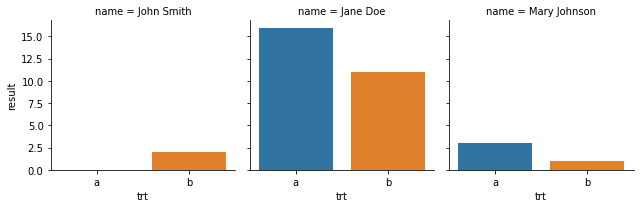

In [84]:
sns.catplot(data=tidy2, x='trt', y='result', col='name', kind='bar', height=3);

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####